# Visualização do espectro de frequência

Nesse notebook iremos explorar a visualização do espectro de frequência de imagens criadas artificialmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = np.zeros((1024, 1024), dtype=float)
image_heigth, image_width = img.shape

In [3]:
# cria um paralelograma
heigth, width = 200, 100
cx, cy = heigth//2, width//2

# coordenadas da imagem
x_coords = np.arange(image_heigth)
y_coords = np.arange(image_width)
xx, yy = np.meshgrid(y_coords, x_coords)

# centraliza o paralelogramo
center_y, center_x = image_heigth // 2, image_width // 2

# define paralelogramo com inclinação, centralizado
skew = 0.3
mask_para = (np.abs(xx - center_x) <= width//2) & (np.abs(yy - center_y + skew*(xx - center_x)) <= heigth//2)
img[mask_para] = 1.0

Para fazer a centralização foi utilizado o metodo np.fft.fftshift, que aplica a seguinte propriedade da Transformada de Fourier:
$$\mathcal{F}\{f(x,y) \cdot (-1)^{x+y}\} = F(u - \frac{M}{2}, v - \frac{N}{2})$$

In [4]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)
F_mag_shift = np.abs(F_shift)
espectro_magnitude = np.log1p(np.abs(F_shift))

É precisso fazer ou log para visualizar melhor o espectro, pois a maioria das frequências estão concentradas em valores baixos.

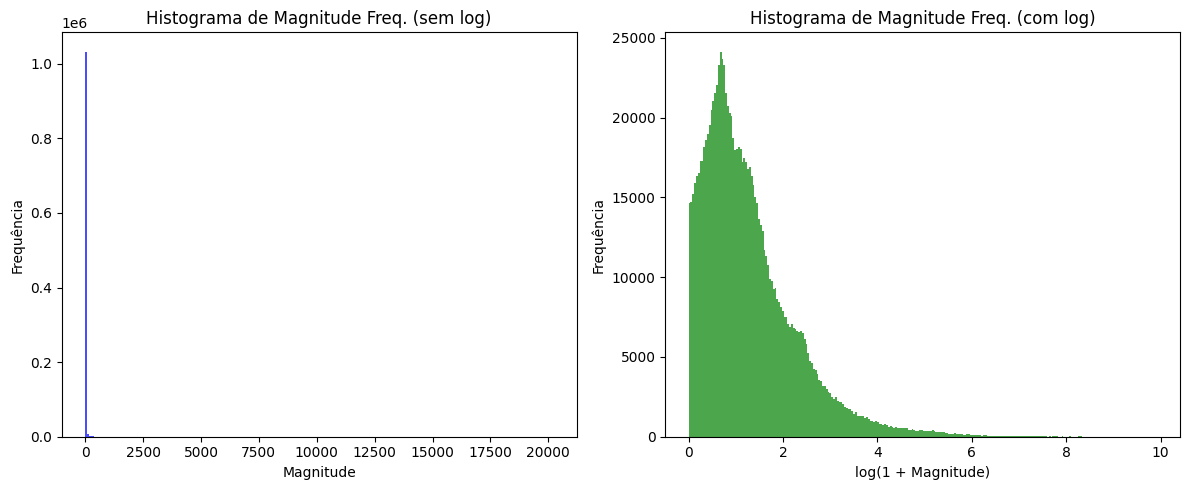

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(F_mag_shift.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Magnitude Freq. (sem log)')
plt.xlabel('Magnitude')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(espectro_magnitude.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histograma de Magnitude Freq. (com log)')
plt.xlabel('log(1 + Magnitude)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


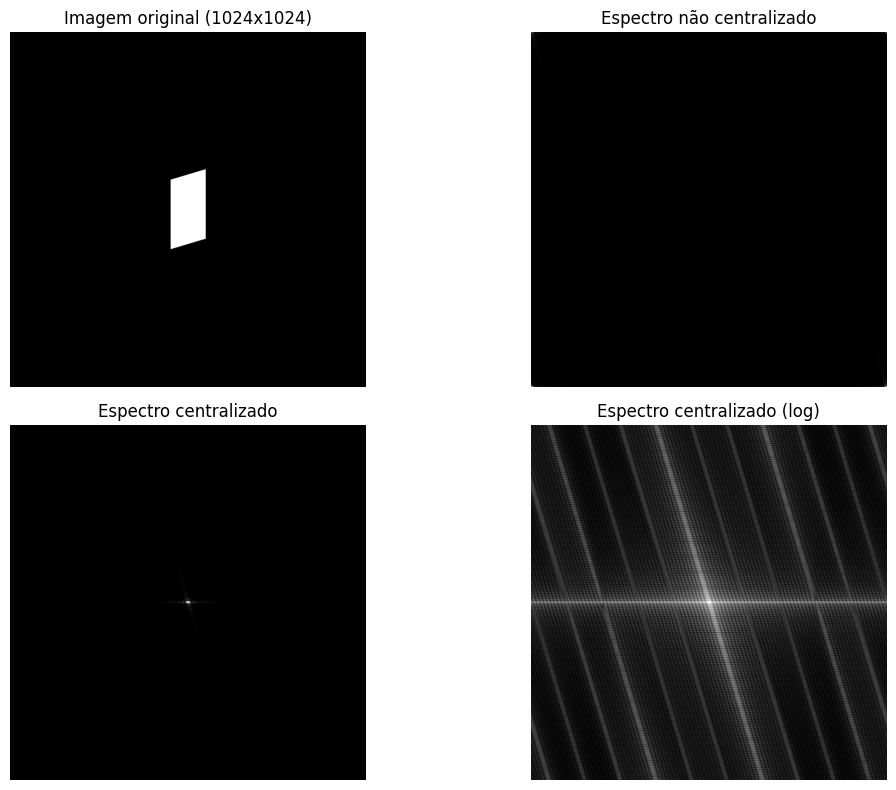

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Imagem original (1024x1024)")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Espectro não centralizado")
plt.imshow(np.abs(F), cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title("Espectro centralizado")
plt.imshow(np.abs(F_shift), cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title("Espectro centralizado (log)")
plt.imshow(espectro_magnitude, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()
